In [50]:
import pandas as pd
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from src.constants import SEX_HEADER, SURVIVED_HEADER, SEX_ENCODED, AGE_HEADER, PCLASS_HEADER


titanic_training_df: DataFrame = pd.read_csv("../data/train.csv")
titanic_training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
titanic_features_df: DataFrame = titanic_training_df[[SURVIVED_HEADER, SEX_HEADER, AGE_HEADER, PCLASS_HEADER]].copy()
titanic_features_df[SEX_ENCODED] = titanic_features_df[SEX_HEADER].map({'male': 0, 'female': 1})
titanic_features_df[AGE_HEADER] = titanic_features_df[AGE_HEADER].fillna(titanic_features_df[AGE_HEADER].median())
titanic_features_df.head()

,Survived,Sex,Age,Pclass,Sex_Encoded
0,0,male,22.0,3,0
1,1,female,38.0,1,1
2,1,female,26.0,3,1
3,1,female,35.0,1,1
4,0,male,35.0,3,0


In [52]:
decision_tree_overfitted = tree.DecisionTreeClassifier()
decision_tree_overfitted = decision_tree_overfitted.fit(
    titanic_features_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]],
    titanic_features_df[SURVIVED_HEADER]
)

[Text(0.47954601377952755, 0.9705882352941176, 'x[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.1655388779527559, 0.9117647058823529, 'x[1] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.3225424458661417, 0.9411764705882353, 'True  '),
 Text(0.015748031496062992, 0.8529411764705882, 'x[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.007874015748031496, 0.7941176470588235, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.023622047244094488, 0.7941176470588235, 'x[1] <= 0.71\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.015748031496062992, 0.7352941176470589, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.031496062992125984, 0.7352941176470589, 'x[1] <= 2.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.015748031496062992, 0.6764705882352942, 'x[1] <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.007874015748031496, 0.6176470588235294, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.

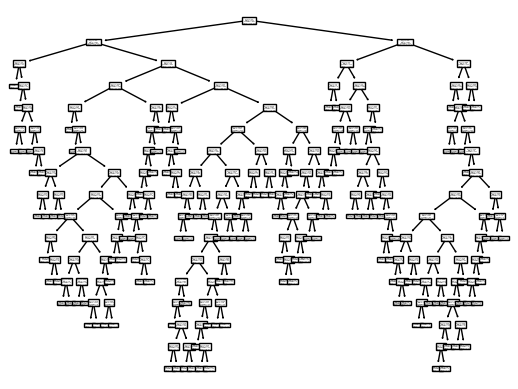

In [53]:
tree.plot_tree(decision_tree_overfitted)

In [54]:
overfitted_train_predictions = decision_tree_overfitted.predict(titanic_features_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]])
overfitted_train_accuracy = accuracy_score(titanic_features_df[SURVIVED_HEADER], overfitted_train_predictions)

print(f"Overfitted Training accuracy: {overfitted_train_accuracy}")

Overfitted Training accuracy: 0.877665544332211


In [55]:
decision_tree_fitted = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10)
decision_tree_fitted = decision_tree_fitted.fit(
    titanic_features_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]],
    titanic_features_df[SURVIVED_HEADER]
)

[Text(0.47580645161290325, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.1532258064516129, 0.75, 'x[1] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.31451612903225806, 0.8333333333333333, 'True  '),
 Text(0.06451612903225806, 0.5833333333333334, 'x[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.03225806451612903, 0.4166666666666667, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.0967741935483871, 0.4166666666666667, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.24193548387096775, 0.5833333333333334, 'x[2] <= 1.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(0.16129032258064516, 0.4166666666666667, 'x[1] <= 53.0\ngini = 0.46\nsamples = 120\nvalue = [77, 43]'),
 Text(0.0967741935483871, 0.25, 'x[1] <= 47.5\ngini = 0.483\nsamples = 98\nvalue = [58, 40]'),
 Text(0.06451612903225806, 0.08333333333333333, 'gini = 0.469\nsamples = 85\nvalue = [53, 32]'),
 Text(0.12903225806451613, 0

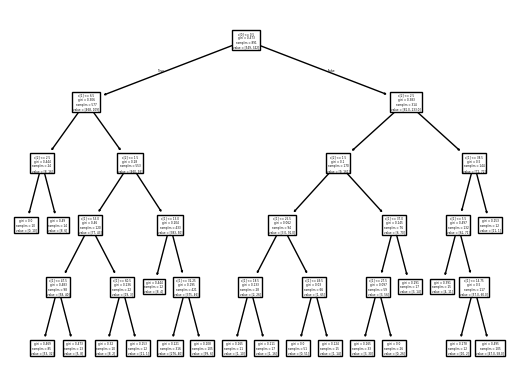

In [56]:
tree.plot_tree(decision_tree_fitted)

In [57]:
fitted_train_predictions = decision_tree_fitted.predict(titanic_features_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]])
fitted_train_accuracy = accuracy_score(titanic_features_df[SURVIVED_HEADER], fitted_train_predictions)

print(f"Fitted Training accuracy: {fitted_train_accuracy}")

Fitted Training accuracy: 0.8215488215488216


In [58]:
randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=20, min_samples_leaf=10)
randomForestClassifier.fit(titanic_features_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]], titanic_features_df[SURVIVED_HEADER])

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


[Text(0.46875, 0.9166666666666666, 'x[2] <= 2.5\ngini = 0.473\nsamples = 565\nvalue = [549, 342]'),
 Text(0.16964285714285715, 0.75, 'x[1] <= 17.5\ngini = 0.492\nsamples = 258\nvalue = [178, 228]'),
 Text(0.3191964285714286, 0.8333333333333333, 'True  '),
 Text(0.07142857142857142, 0.5833333333333334, 'x[0] <= 0.5\ngini = 0.095\nsamples = 22\nvalue = [2, 38]'),
 Text(0.03571428571428571, 0.4166666666666667, 'gini = 0.188\nsamples = 10\nvalue = [2, 17]'),
 Text(0.10714285714285714, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [0, 21]'),
 Text(0.26785714285714285, 0.5833333333333334, 'x[0] <= 0.5\ngini = 0.499\nsamples = 236\nvalue = [176, 190]'),
 Text(0.17857142857142858, 0.4166666666666667, 'x[1] <= 50.5\ngini = 0.362\nsamples = 139\nvalue = [167, 52]'),
 Text(0.14285714285714285, 0.25, 'x[1] <= 24.5\ngini = 0.39\nsamples = 118\nvalue = [138, 50]'),
 Text(0.10714285714285714, 0.08333333333333333, 'gini = 0.193\nsamples = 20\nvalue = [33, 4]'),
 Text(0.17857142857142858, 0.08

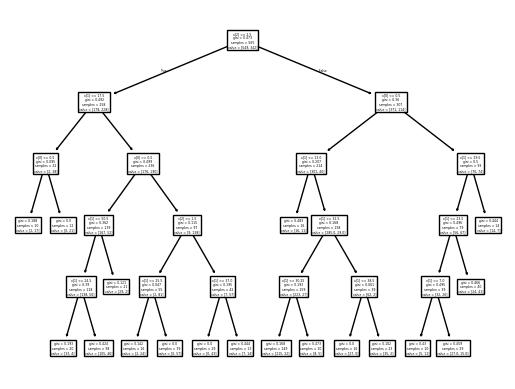

In [59]:
tree.plot_tree(randomForestClassifier.estimators_[0])

In [60]:
forest_train_predictions = randomForestClassifier.predict(titanic_features_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]])
forest_train_accuracy = accuracy_score(titanic_features_df[SURVIVED_HEADER], forest_train_predictions)

print(f"Forest Training accuracy: {forest_train_accuracy}")

Forest Training accuracy: 0.8271604938271605


In [61]:
titanic_test_df: DataFrame = pd.read_csv("../data/test.csv")
titanic_test_df[SEX_ENCODED] = titanic_test_df[SEX_HEADER].map({'male': 0, 'female': 1})
titanic_test_df[AGE_HEADER] = titanic_test_df[AGE_HEADER].fillna(titanic_features_df[AGE_HEADER].median())
titanic_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Encoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [62]:
random_forest_survival_prediction = randomForestClassifier.predict(titanic_test_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]])

In [63]:
random_forest_submission_df = pd.DataFrame({
    'PassengerId': titanic_test_df['PassengerId'],
    'Survived': random_forest_survival_prediction
})

random_forest_submission_df.to_csv('../data/random_forest_submission.csv', index=False)

random_forest_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [64]:
decision_tree_fitted_survival_prediction = decision_tree_fitted.predict(titanic_test_df[[SEX_ENCODED, AGE_HEADER, PCLASS_HEADER]])


In [65]:
decision_tree_fitted_submission_df = pd.DataFrame({
    'PassengerId': titanic_test_df['PassengerId'],
    'Survived': decision_tree_fitted_survival_prediction
})

decision_tree_fitted_submission_df.to_csv('../data/decision_tree_fitted_submission.csv', index=False)

decision_tree_fitted_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
